# OCAMI Algebra Seminar Demonstration

In [1]:
load("tors_lattice.py")

## Input your poset of torsion classes!

Construct your poset and name your poset `poset`.

Input using SageMath's `Poset` function.

In [2]:
poset = Poset( ([1,2,3,4,5], [[1,2], [2,5], [1,3],[3,4],[4,5]] ) )

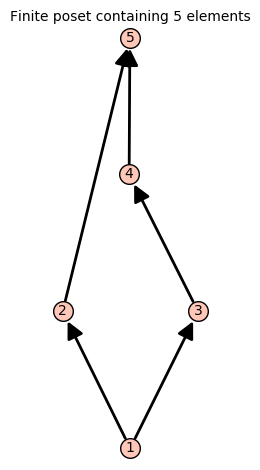

In [3]:
poset

### Important remark
The directions of Hasse arrows in SageMath is **opposite** to our convention!

Input using Jan Geuenich's [String Applet](https://www.math.uni-bielefeld.de/~jgeuenich/string-applet/) and my [String Applet to Sage converter](https://github.com/haruhisa-enomoto/StringApplet-to-SageMath-converter)

In [4]:
load("converter.py")

In [5]:
poset = Poset( SAtoSage("data.tex"))

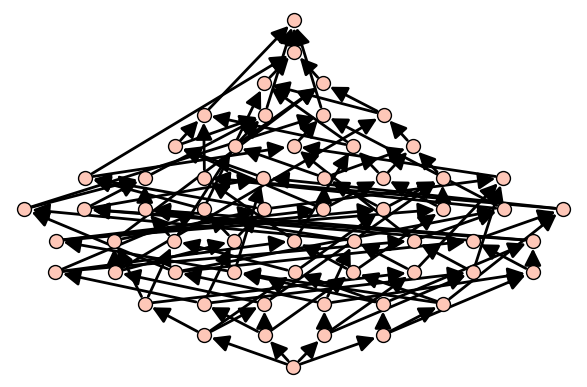

In [6]:
myshow(poset, label=False)

## Enjoy!

Construct the lattice of torsion classes by `TorsLattice(poset)`

In [7]:
tors = TorsLattice(poset)

In [8]:
tors

Lattice of torsion classes of some tau-tilting finite algebra having 60 torsion classes (use the .plot() method to plot)

The lattice of wide subcats: `tors.wide_lattice()`

In [9]:
wide = tors.wide_lattice()

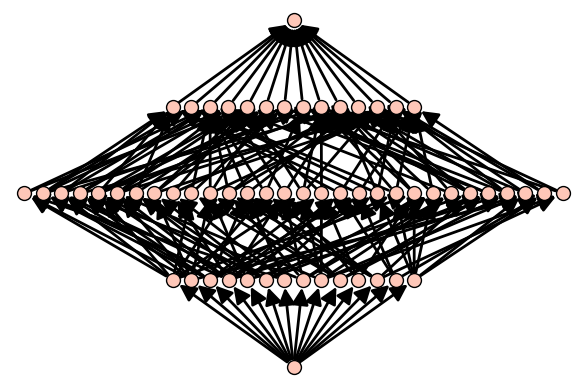

In [10]:
myshow(wide, label=False)

The lattice of ICE-closed subcats: `tors.ice_lattice()`

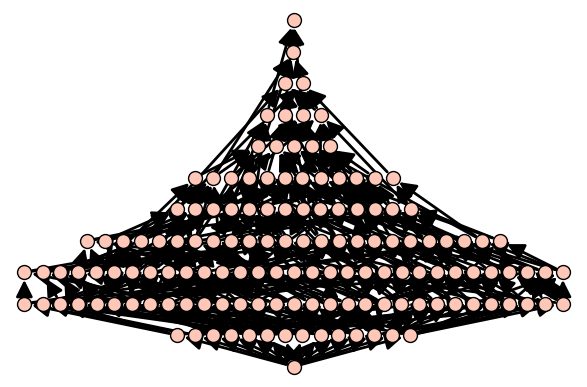

In [11]:
myshow( tors.ice_lattice(), label = False)

The poset of torsion hearts: `tors.heart_poset()`

In [12]:
heart = tors.heart_poset()

In [13]:
heart.is_lattice()

False

$\Delta(\Lambda)$: `tors.s_tau_tilt_complex()`

In [14]:
cpx = tors.s_tau_tilt_complex()

In [15]:
cpx

Simplicial complex with 18 vertices and 60 facets

In [16]:
cpx.h_vector()

[1, 14, 30, 14, 1]

## Path algebra

$\mathsf{tors} kQ$ for a Dynkin quiver $Q$ is given by e.g. Cambiran lattice [Ingalls-Thomas].

Name `W = WeylGroup(["A3"])`, and then SageMath can construct a Cambrian lattice associated with a source sequence:

`W.cambrian_lattice((1,3,2))` is $Q : 1 \to 2 \leftarrow 3$.

In [17]:
W = WeylGroup(["A3"])

In [18]:
poset = W.cambrian_lattice((1,3,2))

In [19]:
tors = TorsLattice(poset)

Let's check that $\mathsf{wide} kQ$ is isomorphic to the so-called **non-crossing partition lattice**.

It's given by `posets.NoncrossingPartitions(W)`.

In [20]:
wide = tors.wide_lattice()

In [21]:
NC = posets.NoncrossingPartitions(W)

In [22]:
NC.is_isomorphic(wide)

True

Now consider $\Delta(kQ)$. It should be isomorphic to:

`ClusterComplex(["A3"])`

In [23]:
cpx = tors.s_tau_tilt_complex()

In [24]:
cpx.is_isomorphic(ClusterComplex(["A3"]))

True

## Preprojective algebra

$\mathsf{tors} \Pi$ is given by the right weak order of the Weyl group [Mizuno].

Let's google how to input this!

In [25]:
W = WeylGroup(["D4"])

In [26]:
poset = W.weak_poset()

In [27]:
tors = TorsLattice(poset)

Compare the lattice of wide subcategories and shard intersection order, given by `W.shard_poset()`

In [28]:
wide = tors.wide_lattice()

In [29]:
shard = W.shard_poset()

In [30]:
wide.is_isomorphic(shard)

True

Guess what is $\Delta(\Pi)$. Maybe compute some invariants like f-vectors, and search it in [OEIS](https://oeis.org/).

In [31]:
cpx = tors.s_tau_tilt_complex()

In [32]:
cpx

Simplicial complex with 48 vertices and 192 facets

In [33]:
cpx.f_vector()

[1, 48, 240, 384, 192]

In [34]:
cpx.is_isomorphic(CoxeterGroup(["D4"]).permutahedron().polar().boundary_complex())

True

## Lattice property for wide subcategories

Let's see what kind of properties the lattice of wide subcategories has.

In [35]:
wide.is_ranked()

True

In [36]:
wide.is_complemented()

True

In [37]:
wide.is_relatively_complemented()

True

In [38]:
wide.is_sperner()

True

In [39]:
wide.is_eulerian()

False

## Counterexample for Sakai's conjecture

The number of Hasse arrows in the poset of ICE-closed subcats is equal to the number of indecomposable Ext-projective objects!

Suppose you have `tors`. Then the next code check this conjecture.

In [40]:
ice = tors.ice_lattice()
ice_itv = {itv for itv in tors.all_itvs() if tors.is_ice_itv(itv)} # the set of all ICE intervals

for itv in ice_itv: 
    num_proj = tors.number_of_projs(itv)
    itv_brick = tors.bricks(itv) 
    num_Hasse_arrows = len(ice.lower_covers(itv_brick))
    if num_proj != num_Hasse_arrows:
        print ("Not True!!")
        break
else:
    print("The conjecture is True in this case.")

Not True!!
